<a href="https://colab.research.google.com/github/pepesrz91/machine-learning-2021-mcc/blob/master/Tarea3_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

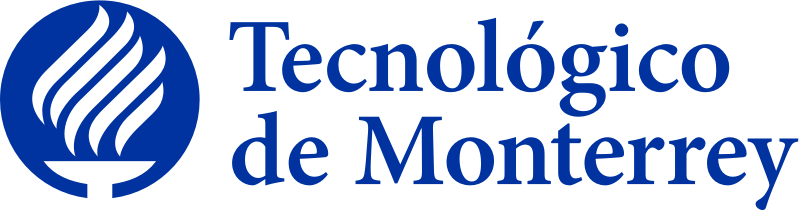

José Juan Suárez Ramos</br>
Tarea 3 </br>
Aprendizaje Automático


In [ ]:
import pandas as pd
from sklearn import preprocessing
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import sklearn.utils as utils

from sklearn.metrics import mean_squared_error


encoder = preprocessing.LabelEncoder()

In [285]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = utils.check_arrays(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

B) realizando transformación el punto A se encuentra más abajo después de haber llevado a cabo las transformaciones. 

In [ ]:
col_names = ["TotalPageLikes", "Type", "Category", "PastMonth", "PostWeekDay", "PostHour", "Paid", "LifetimePostTotalReach","LifetimePostTotalImpressions", "LifeTimeEngagedUsers", "LifetimePostConsumers", "LifeTimePostConsumptions", "LPIPeopleWhohaveLikedPage",  "LPIPeopleWhoLikePage", "LifeTimePeopleEngagedWithPost", "Comment", "Likes", "Share", "TotalInteractions"]
data = pd.read_csv("/content/drive/MyDrive/Presentaciones/dataset_Facebook.csv", sep=";", skiprows=[0], names=col_names)
data.iloc[1:]

,TotalPageLikes,Type,Category,PastMonth,PostWeekDay,PostHour,Paid,LifetimePostTotalReach,LifetimePostTotalImpressions,LifeTimeEngagedUsers,LifetimePostConsumers,LifeTimePostConsumptions,LPIPeopleWhohaveLikedPage,LPIPeopleWhoLikePage,LifeTimePeopleEngagedWithPost,Comment,Likes,Share,TotalInteractions
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
5,139441,Status,2,12,1,9,0.0,10472,20849,1191,1073,1389,16034,7852,1016,1,152.0,33.0,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


In [ ]:
len(col_names)

19

In [ ]:
data.head()

,TotalPageLikes,Type,Category,PastMonth,PostWeekDay,PostHour,Paid,LifetimePostTotalReach,LifetimePostTotalImpressions,LifeTimeEngagedUsers,LifetimePostConsumers,LifeTimePostConsumptions,LPIPeopleWhohaveLikedPage,LPIPeopleWhoLikePage,LifeTimePeopleEngagedWithPost,Comment,Likes,Share,TotalInteractions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [ ]:
data = data.dropna()

In [ ]:
data["Type"] = encoder.fit_transform(data['Type'].astype(str))
data.head()

,TotalPageLikes,Type,Category,PastMonth,PostWeekDay,PostHour,Paid,LifetimePostTotalReach,LifetimePostTotalImpressions,LifeTimeEngagedUsers,LifetimePostConsumers,LifeTimePostConsumptions,LPIPeopleWhohaveLikedPage,LPIPeopleWhoLikePage,LifeTimePeopleEngagedWithPost,Comment,Likes,Share,TotalInteractions
0,139441,1,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,1,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,1,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,1,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [ ]:
print(data.isna().sum()) 

TotalPageLikes                   0
Type                             0
Category                         0
PastMonth                        0
PostWeekDay                      0
PostHour                         0
Paid                             0
LifetimePostTotalReach           0
LifetimePostTotalImpressions     0
LifeTimeEngagedUsers             0
LifetimePostConsumers            0
LifeTimePostConsumptions         0
LPIPeopleWhohaveLikedPage        0
LPIPeopleWhoLikePage             0
LifeTimePeopleEngagedWithPost    0
Comment                          0
Likes                            0
Share                            0
TotalInteractions                0
dtype: int64


In [ ]:
normalized_data = preprocessing.normalize(data)
train_data = pd.DataFrame(normalized_data, columns=col_names)
train_data.head()


,TotalPageLikes,Type,Category,PastMonth,PostWeekDay,PostHour,Paid,LifetimePostTotalReach,LifetimePostTotalImpressions,LifeTimeEngagedUsers,LifetimePostConsumers,LifeTimePostConsumptions,LPIPeopleWhohaveLikedPage,LPIPeopleWhoLikePage,LifeTimePeopleEngagedWithPost,Comment,Likes,Share,TotalInteractions
0,0.998825,0.000007,0.000014,0.000086,0.000029,0.000021,0.000000,0.019713,0.036467,0.001275,0.000781,0.001139,0.022048,0.011747,0.000852,0.000029,0.000566,0.000122,0.000716
1,0.983568,0.000014,0.000014,0.000085,0.000021,0.000071,0.000000,0.073781,0.134421,0.010277,0.009600,0.011808,0.082598,0.043112,0.007815,0.000035,0.000917,0.000205,0.001157
2,0.999096,0.000007,0.000021,0.000086,0.000021,0.000021,0.000000,0.017289,0.031333,0.001268,0.000810,0.001103,0.020148,0.010769,0.000946,0.000000,0.000473,0.000100,0.000573
3,0.751109,0.000005,0.000011,0.000065,0.000011,0.000054,0.000005,0.270018,0.473970,0.011910,0.004255,0.006028,0.328726,0.172629,0.007466,0.000312,0.008468,0.000792,0.009572
4,0.992683,0.000007,0.000014,0.000085,0.000014,0.000021,0.000000,0.051570,0.096776,0.004777,0.002919,0.004129,0.044337,0.022781,0.002819,0.000135,0.002314,0.000349,0.002798


In [ ]:
data.head()

,TotalPageLikes,Type,Category,PastMonth,PostWeekDay,PostHour,Paid,LifetimePostTotalReach,LifetimePostTotalImpressions,LifeTimeEngagedUsers,LifetimePostConsumers,LifeTimePostConsumptions,LPIPeopleWhohaveLikedPage,LPIPeopleWhoLikePage,LifeTimePeopleEngagedWithPost,Comment,Likes,Share,TotalInteractions
0,139441,1,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,1,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,1,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,1,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [ ]:
X = train_data[["TotalPageLikes", "Type", "Category", "PastMonth", "PostWeekDay", "PostHour", "Paid", "LifetimePostTotalReach","LifetimePostTotalImpressions", "LifeTimeEngagedUsers", "LifetimePostConsumers", "LifeTimePostConsumptions", "LPIPeopleWhohaveLikedPage",  "LPIPeopleWhoLikePage", "LifeTimePeopleEngagedWithPost", "Comment", "Share", "TotalInteractions"]]
Y = train_data["Likes"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
print(X_train)

     const  TotalPageLikes      Type  ...   Comment     Share  TotalInteractions
163    1.0        0.980102  0.000007  ...  0.000058  0.000463           0.004031
228    1.0        0.971024  0.000015  ...  0.000044  0.000007           0.000155
107    1.0        0.979444  0.000014  ...  0.000122  0.000201           0.001705
347    1.0        0.993457  0.000009  ...  0.000034  0.000282           0.001732
231    1.0        0.973316  0.000015  ...  0.000022  0.000007           0.000126
..     ...             ...       ...  ...       ...       ...                ...
320    1.0        0.997660  0.000008  ...  0.000016  0.000049           0.000527
15     1.0        0.978129  0.000014  ...  0.000028  0.000127           0.000763
484    1.0        0.967249  0.000011  ...  0.000236  0.000900           0.004252
125    1.0        0.999917  0.000007  ...  0.000000  0.000007           0.000037
265    1.0        0.997516  0.000008  ...  0.000016  0.000031           0.000413

[396 rows x 19 columns]


A) Prueba de Shapiro-Wilk 

Es una prueba de normalidad. Si p-value es menor a .05 significa que la hipótesis falla y que nuestros datos no están normalizados. Con los resultados siguientes se comprueba que los datos están normalizados ya que su p'value es mayor a un alfa de 0.05

In [ ]:
stats.shapiro(train_data["Likes"])

(0.6482378244400024, 1.2067595853281703e-30)

In [ ]:
stats.shapiro(data["LifetimePostConsumers"])

(0.6203077435493469, 1.42813383014028e-31)

In [ ]:
stats.shapiro(data["LifeTimePeopleEngagedWithPost"])

(0.6745402812957764, 1.0220437007857194e-29)

# C)

In [ ]:

model_1 = sm.OLS(Y_train, X_train).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.166e+29
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        04:18:39   Log-Likelihood:                 14681.
No. Observations:                 396   AIC:                        -2.932e+04
Df Residuals:                     377   BIC:                        -2.925e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [ ]:
## Prediction Formula
formula = ""
x = 1
for val in model_1.params:
  formula += f'{val}x{x} +'
  x += 1
print(formula)

-1.2793585635328952e-17x1 +-1.235990476633475e-17x2 +2.6645352591003757e-14x3 +-1.7763568394002505e-15x4 +8.881784197001252e-16x5 +2.886579864025407e-15x6 +-2.9976021664879227e-15x7 +-2.3359092438113294e-13x8 +2.1250362580715887e-17x9 +-8.456776945386935e-18x10 +5.551115123125783e-16x11 +1.1102230246251565e-16x12 +-3.165870343657673e-17x13 +4.445228907190568e-18x14 +-1.734723475976807e-17x15 +5.065392549852277e-16x16 +-0.9999999999999973x17 +-0.9999999999999998x18 +1.0x19 +


In [ ]:
predictions = model_1.predict(X_test) 
np.corrcoef(predictions, Y_test.T)

array([[1., 1.],
       [1., 1.]])

In [ ]:
SSE = np.sum(np.power(predictions - Y_test.values, 2), axis=0)
SSE

1.236913403517004e-31

In [ ]:
X = train_data[["Type", "Category", "PastMonth", "PostWeekDay", "PostHour", "Paid", "LifetimePostTotalReach","LifetimePostTotalImpressions", "LifeTimeEngagedUsers", "LifetimePostConsumers", "LifeTimePostConsumptions", "LPIPeopleWhohaveLikedPage",  "LPIPeopleWhoLikePage", "LifeTimePeopleEngagedWithPost", "Comment", "Share", "TotalInteractions"]]
Y = train_data["LifetimePostConsumers"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
print(X_train)

     const      Type  Category  ...   Comment     Share  TotalInteractions
163    1.0  0.000007  0.000022  ...  0.000058  0.000463           0.004031
228    1.0  0.000015  0.000015  ...  0.000044  0.000007           0.000155
107    1.0  0.000014  0.000014  ...  0.000122  0.000201           0.001705
347    1.0  0.000009  0.000026  ...  0.000034  0.000282           0.001732
231    1.0  0.000015  0.000015  ...  0.000022  0.000007           0.000126
..     ...       ...       ...  ...       ...       ...                ...
320    1.0  0.000008  0.000024  ...  0.000016  0.000049           0.000527
15     1.0  0.000014  0.000014  ...  0.000028  0.000127           0.000763
484    1.0  0.000011  0.000034  ...  0.000236  0.000900           0.004252
125    1.0  0.000007  0.000007  ...  0.000000  0.000007           0.000037
265    1.0  0.000008  0.000008  ...  0.000016  0.000031           0.000413

[396 rows x 18 columns]


In [ ]:
model_2 = sm.OLS(Y_train, X_train).fit()
print(model_2.summary())

                              OLS Regression Results                             
Dep. Variable:     LifetimePostConsumers   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 7.379e+28
Date:                   Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                           04:18:59   Log-Likelihood:                 14017.
No. Observations:                    396   AIC:                        -2.800e+04
Df Residuals:                        378   BIC:                        -2.793e+04
Df Model:                             17                                         
Covariance Type:               nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [ ]:
## Prediction Formula
formula = ""
x = 1
for val in model_2.params:
  formula += f'{val}x{x} +'
  x += 1
print(formula)

5.182486384480711e-17x1 +-1.0658141036401503e-12x2 +1.3500311979441904e-13x3 +1.0391687510491465e-13x4 +-3.019806626980426e-14x5 +1.7763568394002505e-15x6 +-1.0658141036401503e-13x7 +-5.963111948670274e-16x8 +3.5952144039619327e-16x9 +1.7763568394002505e-15x10 +1.0000000000000067x11 +3.469446951953614e-17x12 +-4.7704895589362195e-18x13 +-4.891920202254596e-16x14 +2.220446049250313e-16x15 +0.0x16 +-4.440892098500626e-15x17 +2.6645352591003757e-15x18 +


In [ ]:
predictions = model_2.predict(X_test) 
np.corrcoef(predictions, Y_test.T)

array([[1., 1.],
       [1., 1.]])

In [ ]:
SSE = np.sum(np.power(predictions - Y_test.values, 2), axis=0)
SSE

1.236913403517004e-31

In [ ]:
X = train_data[["Type", "Category", "PastMonth", "PostWeekDay", "PostHour", "Paid", "LifetimePostTotalReach","LifetimePostTotalImpressions", "LifeTimeEngagedUsers", "LifetimePostConsumers", "LifeTimePostConsumptions", "LPIPeopleWhohaveLikedPage",  "LPIPeopleWhoLikePage", "LifeTimePeopleEngagedWithPost", "Comment", "Share", "TotalInteractions"]]
Y = train_data["LifeTimePeopleEngagedWithPost"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [ ]:
model_3 = sm.OLS(Y_train, X_train).fit()
print(model_3.summary())

                                      OLS Regression Results                                      
Dep. Variable:     LifeTimePeopleEngagedWithPost   R-squared (uncentered):                   1.000
Model:                                       OLS   Adj. R-squared (uncentered):              1.000
Method:                            Least Squares   F-statistic:                          5.556e+29
Date:                           Mon, 13 Sep 2021   Prob (F-statistic):                        0.00
Time:                                   04:19:16   Log-Likelihood:                          14407.
No. Observations:                            396   AIC:                                 -2.878e+04
Df Residuals:                                379   BIC:                                 -2.871e+04
Df Model:                                     17                                                  
Covariance Type:                       nonrobust                                                  
          

In [ ]:
## Prediction Formula
formula = ""
x = 1
for val in model_3.params:
  formula += f'{val}x{x} +'
  x += 1
print(formula)

-1.7408297026122455e-13x1 +-2.2382096176443156e-13x2 +5.240252676230739e-14x3 +-6.750155989720952e-14x4 +2.7533531010703882e-14x5 +1.8829382497642655e-13x6 +-2.7755575615628914e-17x7 +-1.465841337200402e-16x8 +3.1086244689504383e-15x9 +-2.220446049250313e-15x10 +1.5612511283791264e-17x11 +-2.7321894746634712e-17x12 +1.6046192152785466e-17x13 +0.9999999999999998x14 +-1.2656542480726785e-14x15 +2.1316282072803006e-14x16 +-3.774758283725532e-15x17 +


In [ ]:
predictions = model_3.predict(X_test) 
np.corrcoef(predictions, Y_test.T)

array([[1., 1.],
       [1., 1.]])

In [ ]:
SSE = np.sum(np.power(predictions - Y_test.values, 2), axis=0)
SSE

1.236913403517004e-31

D) Creo que los resultados de las pruebas no fueron los correctos. Todas las predicciones salen con un R-cuadrado y ajustado de 1. Por lo que me está arrojando falso positivo. Puede ser que haya una variable la cual le está dando los resultados de antemano al modelo. 

